In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
train_A=pd.read_csv("../糖尿病相關資料集/實驗A/train_data.csv")
test_A=pd.read_csv("../糖尿病相關資料集/實驗A/test_data.csv")
train_B=pd.read_csv("../糖尿病相關資料集/實驗B/train_data.csv")
test_B=pd.read_csv("../糖尿病相關資料集/實驗B/test_data.csv")


In [3]:
#Data preprocessing: https://ithelp.ithome.com.tw/articles/10216967
##Data cleaning
train_A=train_A.dropna(axis=0)
test_A=test_A.dropna(axis=0)
train_B=train_B.dropna(axis=0)
test_B=test_A.dropna(axis=0)


##Data normalization
# Create a MinMaxScaler object: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
scaler = MinMaxScaler() #m = (x -xmin) / (xmax -xmin)

# Define the features and target variable
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Fit the scaler on the training data
scaler.fit(train_A[features])
display(train_A[features])

# Apply the scaler to the training and testing data
train_A[features] = scaler.transform(train_A[features])
test_A[features] = scaler.transform(test_A[features])
display(train_A[features])

scaler = MinMaxScaler()
scaler.fit(train_B[features])
train_B[features] = scaler.transform(train_B[features])
test_B[features] = scaler.transform(test_B[features])


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
562,1,87,68,34,77,37.6,0.401,24
563,6,99,60,19,54,26.9,0.497,32
564,0,91,80,0,0,32.4,0.601,27
565,2,95,54,14,88,26.1,0.748,22


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.747475,0.590164,0.555556,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.429293,0.540984,0.460317,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.924242,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.449495,0.540984,0.365079,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.691919,0.327869,0.555556,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
562,0.058824,0.439394,0.557377,0.539683,0.091017,0.560358,0.137916,0.050000
563,0.352941,0.500000,0.491803,0.301587,0.063830,0.400894,0.178907,0.183333
564,0.000000,0.459596,0.655738,0.000000,0.000000,0.482861,0.223313,0.100000
565,0.117647,0.479798,0.442623,0.222222,0.104019,0.388972,0.286080,0.016667


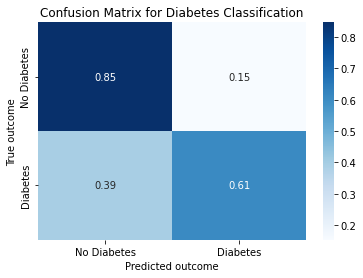

Accuracy: 0.7611940298507462
Recall: 0.6056338028169014
Precision: 0.6825396825396826
F1: 0.6417910447761194


In [4]:
# Group A
train=train_A
test=test_A

# Create a Gaussian Naive Bayes model
model = GaussianNB() 
#調整平滑參數:避免在測試集上出現零機率的情況，進而避免分類器產生過度擬合（overfitting）的情況，平滑參數的值越小，
#      分類器的過度擬合情況就越嚴重，而平滑參數的值越大，分類器的欠擬合情況就越嚴重。例如:model = GaussianNB(var_smoothing=0.5)

# Fit the model on the training data
#train[features]:訓練資料， train[target]:training target
model.fit(train[features], train[target])

# Make predictions on the testing data
predictions = model.predict(test[features])
# print(predictions) #Predicted results of the test
# print(test[target]) #test outcome
# print(model.score(test[features],test[target])) #prediction accuracy

# Create a confusion matrix: https://weikaiwei.com/python/ml-confusion-matrix/
cm = confusion_matrix(test[target], predictions)
# print(cm) #[[110  20] [ 28  43]]: [[predict] [true]]

# Normalize the confusion matrix
#cm.sum(axis=1) #[130  71]
#cm.sum(axis=1)[:, np.newaxis] #[[130] [ 71]]。因為將一維陣列與二維陣列相除可能會產生錯誤，所以將cm.sum(axis=1)的row增加維度，變成二維陣列
cm_normalize = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #[[0.84615385 0.15384615] [0.3943662  0.6056338 ]]

# Create a heatmap of the normalized confusion matrix: https://medium.com/python-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96/python-%E5%95%86%E6%A5%AD%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90%E4%B9%8B%E5%8F%AF%E8%A6%96%E5%8C%96%E7%B9%AA%E5%9C%96-%E7%AC%AC19%E8%AC%9B-%E7%86%B1%E5%8A%9B%E5%9C%96-seaborn-heatmap-cf1b17d7964e
plt.figure(facecolor='white')
sns.heatmap(cm_normalize, annot=True, cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes']) #annot:是否添加註釋
plt.xlabel('Predicted outcome')
plt.ylabel('True outcome')
plt.title('Confusion Matrix for Diabetes Classification')

# Display the plot
plt.show()

# Calculate the accuracy score, recall score, precision score
accuracy = accuracy_score(test[target], predictions) #
recall=recall_score(test[target], predictions)
precision=precision_score(test[target], predictions)
f1=f1_score(test[target], predictions)

# Print the accuracy score
print('Accuracy:', accuracy) #(TP+TN)/(TP+TN+FP+FN)
print('Recall:', recall) #(TP)/(TP+FN)
print('Precision:', precision) #TP/(TP+FP)
print('F1:', f1) #(precision*recall)/(precision+recall)

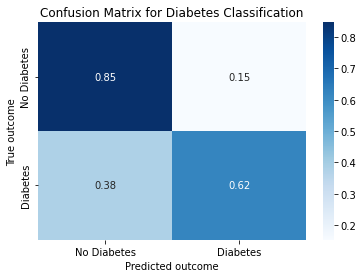

Accuracy: 0.7661691542288557
Recall: 0.6197183098591549
Precision: 0.6875
F1: 0.6518518518518518


In [5]:
# Group B
train=train_B
test=test_B

# Create a Gaussian Naive Bayes model
model = GaussianNB() 
#調整平滑參數:避免在測試集上出現零機率的情況，進而避免分類器產生過度擬合（overfitting）的情況，平滑參數的值越小，
#      分類器的過度擬合情況就越嚴重，而平滑參數的值越大，分類器的欠擬合情況就越嚴重。例如:model = GaussianNB(var_smoothing=0.5)

# Fit the model on the training data
#train[features]:訓練資料， train[target]:training target
model.fit(train[features], train[target])

# Make predictions on the testing data
predictions = model.predict(test[features])
# print(predictions) #Predicted results of the test
# print(test[target]) #test outcome
# print(model.score(test[features],test[target])) #prediction accuracy

# Create a confusion matrix: https://weikaiwei.com/python/ml-confusion-matrix/
cm = confusion_matrix(test[target], predictions)
# print(cm) #[[110  20] [ 28  43]]: [[predict] [true]]

# Normalize the confusion matrix
#cm.sum(axis=1) #[130  71]
#cm.sum(axis=1)[:, np.newaxis] #[[130] [ 71]]。因為將一維陣列與二維陣列相除可能會產生錯誤，所以將cm.sum(axis=1)的row增加維度，變成二維陣列
cm_normalize = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #[[0.84615385 0.15384615] [0.3943662  0.6056338 ]]

# Create a heatmap of the normalized confusion matrix: https://medium.com/python-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96/python-%E5%95%86%E6%A5%AD%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90%E4%B9%8B%E5%8F%AF%E8%A6%96%E5%8C%96%E7%B9%AA%E5%9C%96-%E7%AC%AC19%E8%AC%9B-%E7%86%B1%E5%8A%9B%E5%9C%96-seaborn-heatmap-cf1b17d7964e
plt.figure(facecolor='white')
sns.heatmap(cm_normalize, annot=True, cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes']) #annot:是否添加註釋
plt.xlabel('Predicted outcome')
plt.ylabel('True outcome')
plt.title('Confusion Matrix for Diabetes Classification')

# Display the plot
plt.show()

# Calculate the accuracy score, recall score, precision score
accuracy = accuracy_score(test[target], predictions) #
recall=recall_score(test[target], predictions)
precision=precision_score(test[target], predictions)
f1=f1_score(test[target], predictions)

# Print the accuracy score
print('Accuracy:', accuracy) #(TP+TN)/(TP+TN+FP+FN)
print('Recall:', recall) #(TP)/(TP+FN)
print('Precision:', precision) #TP/(TP+FP)
print('F1:', f1) #(precision*recall)/(precision+recall)